# **Assignment 4 - Model Interpretability**

Interpret your models.

1. Fit a linear model and interpret the regression coefficients

2. Fit a tree-based model and interpret the nodes

3.  Use auto ml to find the best model

4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.

In [16]:
#Importing all the dependencies
import pandas as pd
!pip install shap
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 564 kB 4.5 MB/s 


# 1. Fit a linear model and interpret the regression coefficients

In [5]:
 #importing the dataset
 df = pd.read_csv (r'Employee.csv')

In [6]:
# Converting the categorical to numerical values
# get the dummies and store it in a variable
dummies = pd.get_dummies(data=df, columns=['Education', 'Gender','EverBenched'])
 
# Concatenate the dummies to original dataframe
useful_feature = pd.concat([df, dummies],  axis=1)
# merged.drop(['Gender'], axis=1, inplace=True)

# drop the values
useful_feature.drop(['Education', 'City', 'Gender' , 'EverBenched'], axis='columns', inplace=True)

# drop the duplicate columns
useful_feature = useful_feature.loc[:,~useful_feature.columns.duplicated()]

# print the data
print(useful_feature)

      JoiningYear  PaymentTier  Age  ExperienceInCurrentDomain  LeaveOrNot  \
0            2017            3   34                          0           0   
1            2013            1   28                          3           1   
2            2014            3   38                          2           0   
3            2016            3   27                          5           1   
4            2017            3   24                          2           1   
...           ...          ...  ...                        ...         ...   
4648         2013            3   26                          4           0   
4649         2013            2   37                          2           1   
4650         2018            3   27                          5           1   
4651         2012            3   30                          2           0   
4652         2015            3   33                          4           0   

      Education_Bachelors  Education_Masters  Education_PHD  Ge

In [7]:
#Setting independent and dependent features
X = useful_feature.loc[:, useful_feature.columns!='LeaveOrNot'] #independent columns
y = useful_feature["LeaveOrNot"]  #target column i.e LeaveOrNot

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

Performing Linear Regression model

In [9]:
from sklearn import linear_model
model = linear_model.LinearRegression()
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
model.fit(X_train,y_train)

LinearRegression()

In [11]:
model.score(X_train,y_train)

0.1139775273233119

The linear regression model score is 11%

Apply trained model to make prediction on test data

In [12]:
y_pred= model.predict(X_test)

In [13]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [ 0.03494038 -0.10293119 -0.004685   -0.00459287 -0.01129779  0.09849804
 -0.08720025  0.09304027 -0.09304027 -0.06634472  0.06634472]
Intercept: -69.56845154071998
Mean squared error (MSE): 0.19
Coefficient of determination (R^2): 0.12


A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase.
The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant.

In [14]:
r2_score(y_test, y_pred)

0.1184781770410801

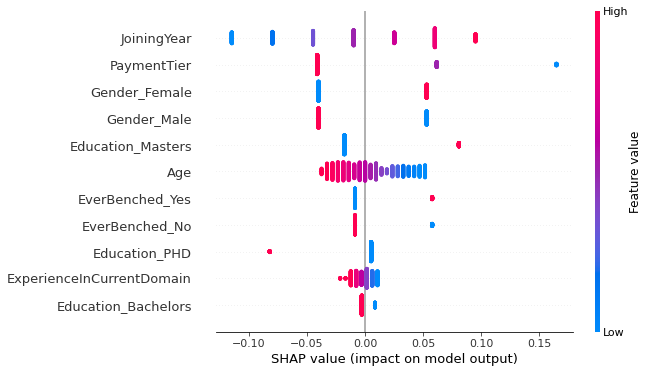

In [18]:
##SHAP Value on Logistic Regression
explainer = shap.LinearExplainer(model, X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

**Ans.** By looking at the Shap summary, we conclude that "Joining Year" has the highest feature importance and "Education_bachelors" has the lowest value. If the Joining year is older than the employee is more likely to leave, if the joining year is more recent, the employee is less likely to leave soon. Similarly, the 2nd most signiicant feature is Payment Tier, The higher the payment the more likely the employee will stay in the company, and lastly there is a tie between the Genders Male and female, whose chances of staying in the company are 50-50.

In [19]:
ex = shap.KernelExplainer(model.predict, X_test)
shap.initjs()

# Plotting for test data
shap_values = ex.shap_values(X_test.iloc[0,:])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[0,:])

X does not have valid feature names, but LinearRegression was fitted with feature names
Using 931 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names


# **2. Fit a tree-based model and interpret the nodes**

In [23]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [24]:
#Use DecisionTreeClassifier
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [25]:
model.fit(X, y)

DecisionTreeClassifier()

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


Confusion matrix, without normalization
[[2342   77]
 [ 357  946]]
Normalized confusion matrix
[[0.96816866 0.03183134]
 [0.27398312 0.72601688]]


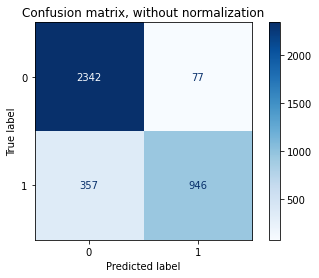

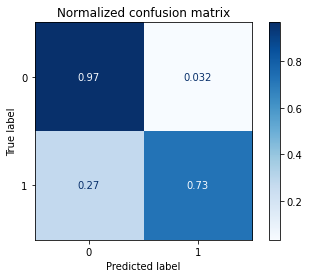

In [26]:
#Plotting Confusion Matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_train, y_train,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [27]:
model.score(X,y)

0.8931871910595315

In [28]:
model.predict(X_train)

array([0, 1, 0, ..., 1, 0, 0])

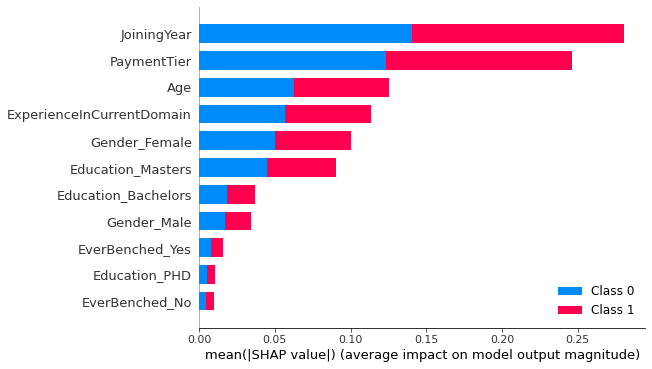

In [29]:
# explain all the predictions in the test set
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

**Ans.** Joining year has the highest feature importance and Education_PHD has the lowest feature importance. The second most important feature is Age closely followed by Experience. The distribution of Class 1 and class 0 is almost identical so we can interpret that there are no biasing.

# **3.  Use auto ml to find the best model**

In [30]:
!pip install requests
!pip install "colorama>=0.3.8"
!pip install future
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 177.0 MB 18 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.1-py2.py3-none-any.whl size=177068062 sha256=e37ce856ab2af622b0f849f704549f702515611b096a3045f7ac502c2fc90602
  Stored in directory: /root/.cache/pip/wheels/a6/d9/ab/5442447c7e2ccf07f66aa8b79f3877ce5382f0b95e6c0c797b
Successfully built h2o


In [31]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt

import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt

In [32]:
min_mem_size=6 
run_time=222

In [33]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [34]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:36186 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.14.1" 2022-02-08; OpenJDK Runtime Environment (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp16bad1ra
  JVM stdout: /tmp/tmp16bad1ra/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp16bad1ra/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:36186
Connecting to H2O server at http://127.0.0.1:36186 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_9pxhqi
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [35]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.14.1" 2022-02-08; OpenJDK Runtime Environment (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpewtsquqt
  JVM stdout: /tmp/tmpewtsquqt/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpewtsquqt/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_unknownUser_7s1me3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [36]:
url = "https://raw.githubusercontent.com/SathwikHegde/neu-mis-info6105-spring-2022_Assignment2_SathwikHegde/main/Employee.csv"
df = h2o.import_file(path = url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [37]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [38]:
print(df_train.shape)
print(df_test.shape)

(3722, 10)
(931, 10)


In [39]:
# Set the features and target
X=df.columns
print(X)

['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot', 'Churn']


In [40]:
# Set target and predictor variables
# y ='churn'
y_numeric ='LeaveOrNot'
# X.remove(y) 
X.remove(y_numeric) 
print(X)

['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain', 'Churn']


In [41]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [44]:
aml.train(x=X,y=y_numeric,training_frame=df_train) 

AutoML progress: |
20:18:06.159: _train param, Dropping bad and constant columns: [Churn]
20:18:06.159: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.

███
20:18:15.182: _train param, Dropping bad and constant columns: [Churn]
20:18:15.182: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.

█
20:18:17.975: _train param, Dropping bad and constant columns: [Churn]
20:18:17.975: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.

███
20:18:31.187: _train

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.229752,0.004971,0.227997,0.235143,0.225909,0.224760,0.234950
1,mean_residual_deviance,0.113354,0.003895,0.111241,0.114960,0.108850,0.112637,0.119084
2,mse,0.113354,0.003895,0.111241,0.114960,0.108850,0.112637,0.119084
3,null_deviance,168.346360,6.662888,165.870590,173.465820,171.854430,172.820630,157.720340
4,r2,0.497995,0.022361,0.498404,0.481011,0.525786,0.513319,0.471457
5,residual_deviance,84.337685,3.244757,83.097100,89.898490,81.419680,83.914310,83.358860
6,rmse,0.336642,0.005767,0.333528,0.339057,0.329924,0.335614,0.345086
7,rmsle,0.236586,0.004479,0.235526,0.240722,0.231149,0.233914,0.241619


In [46]:
print(aml.leaderboard)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_1_20220424_201805,0.336585,0.113289,0.229689,0.236588,0.113289
StackedEnsemble_AllModels_3_AutoML_1_20220424_201805,0.336757,0.113405,0.230526,0.236577,0.113405
GBM_grid_1_AutoML_1_20220424_201805_model_12,0.337094,0.113633,0.229899,0.237007,0.113633
StackedEnsemble_AllModels_2_AutoML_1_20220424_201805,0.338487,0.114573,0.234571,0.238007,0.114573
StackedEnsemble_BestOfFamily_3_AutoML_1_20220424_201805,0.33861,0.114657,0.234591,0.238074,0.114657
StackedEnsemble_AllModels_1_AutoML_1_20220424_201805,0.339174,0.115039,0.235976,0.238748,0.115039
StackedEnsemble_BestOfFamily_2_AutoML_1_20220424_201805,0.339426,0.11521,0.235081,0.23908,0.11521
GBM_5_AutoML_1_20220424_201805,0.339568,0.115306,0.240095,0.238952,0.115306
GBM_2_AutoML_1_20220424_201805,0.340267,0.115782,0.241186,0.239791,0.115782
XGBoost_grid_1_AutoML_1_20220424_201805_model_21,0.341365,0.11653,0.241043,0.239763,0.11653


In [47]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'GBM_grid_1_AutoML_1_20220424_201805_model_12': 2,
 'GLM_1_AutoML_1_20220424_201805': 59,
 'StackedEnsemble_AllModels_3_AutoML_1_20220424_201805': 1,
 'StackedEnsemble_BestOfFamily_4_AutoML_1_20220424_201805': 0}

In [48]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

2


In [49]:
best_model.algo

'gbm'

Gradient Boosting Machines is the best model to run after training the model with AutoML.

In [50]:
X_train.shape, y_train.shape

((3722, 11), (3722,))

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier()
X = useful_feature.loc[:, useful_feature.columns!='LeaveOrNot'] #independent columns
y = useful_feature["LeaveOrNot"]  #target column i.e LeaveOrNot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
gbm_model.fit(X_train, y_train)
gbm_model.score(X_test, y_test)

0.8259935553168636

We get a score of 82% accuracy with gbm model.

In [52]:
lb = aml.leaderboard
lb
bst_model = aml.leader

feature_names = list(X_train.columns)

In [53]:
class H2OProbWrapper:
    def __init__(self, h2o_model, feature_names):
        self.h2o_model = h2o_model
        self.feature_names = feature_names

    def predict_binary_prob(self, X):
        if isinstance(X, pd.Series):
            X = X.values.reshape(1,-1)
        self.dataframe= pd.DataFrame(X, columns=self.feature_names)
        self.predictions = self.h2o_model.predict(h2o.H2OFrame(self.dataframe)).as_data_frame().values
        return self.predictions.astype('float64')[:,-1] #probability of True class

In [54]:
h2o_wrapper = H2OProbWrapper(bst_model,feature_names) 

In [55]:
explainer = shap.KernelExplainer(h2o_wrapper.predict_binary_prob, X_train.iloc[:100,:])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Education': substituting in a column of NaN
Test/Validation dataset is missing column 'City': substituting in a column of NaN
Test/Validation dataset is missing column 'Gender': substituting in a column of NaN
Test/Validation dataset is missing column 'EverBenched': substituting in a column of NaN


In [56]:
shap.initjs()
shap_values = explainer.shap_values(X_test.iloc[:50], nsamples=500)
shap.force_plot(explainer.expected_value, shap_values, X_test.iloc[:50])

  0%|          | 0/50 [00:00<?, ?it/s]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


Test/Validation dataset is missing column 'Education': substituting in a column of NaN
Test/Validation dataset is missing column 'City': substituting in a column of NaN
Test/Validation dataset is missing column 'Gender': substituting in a column of NaN
Test/Validation dataset is missing column 'EverBenched': substituting in a column of NaN


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |█████████████████████████████████

The force plot on shap values shows us that the payment tier, joining year and age are the most important features. The lower the payment and higher values of joining year and age, indicates that the employee is more likley to leave the company.

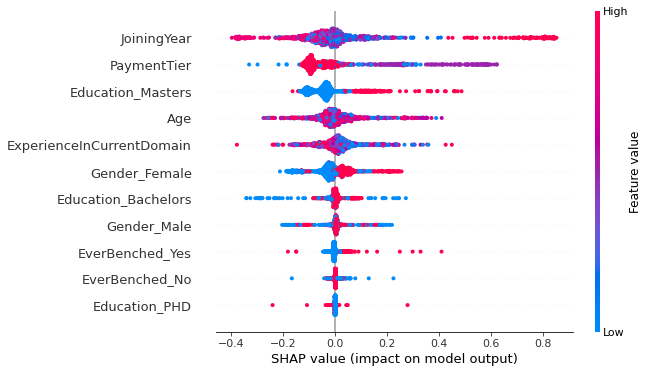

In [76]:
shap.summary_plot(shap_values, X_test)

**Ans.** After the shap analysis on GBM model, we figure out that Joining Year and Payment Tier and Education_Masters are the 3 most significant features, similar analysis to what we got for linear and tree model shap analysis.

# **4. Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods.**

In [59]:
!pip install shap
import shap
shap.initjs()

# **Partial Dependence Plots**

We are going to plot some partial dependence plots on our models to get a deeper insights on our shap analysis to interpret with other models.

In [60]:
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)

Permutation explainer: 932it [01:27, 10.17it/s]                         


In [61]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

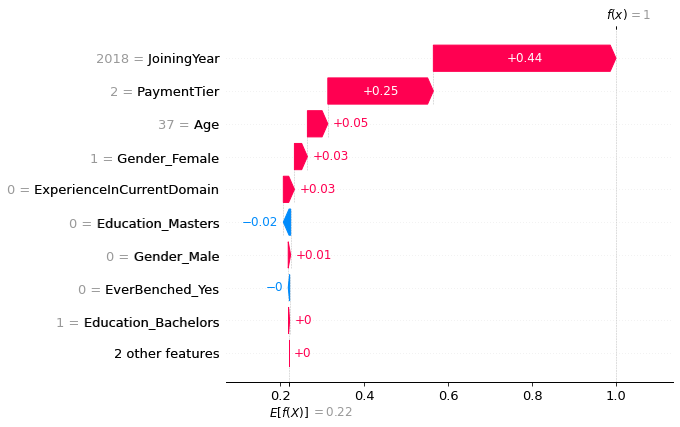

In [62]:
sample_feature_importance(0, 'waterfall')

In [84]:
shap.initjs()
sample_feature_importance(0, 'condensed')

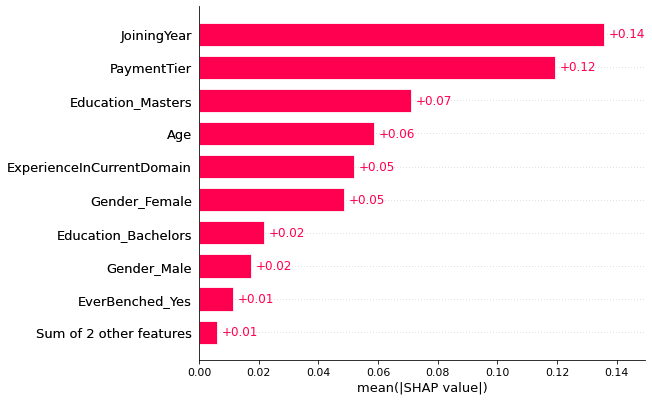

In [64]:
shap.plots.bar(shap_values)

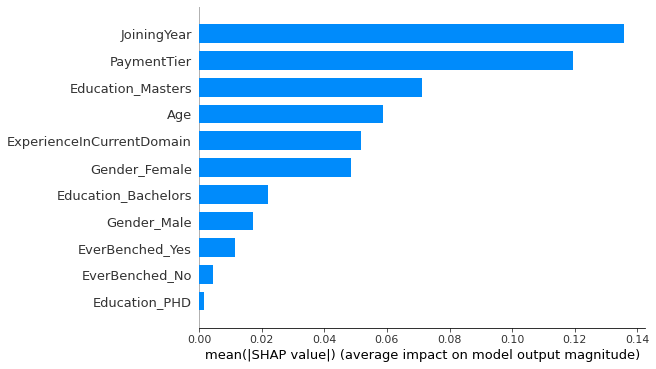

In [65]:
shap.summary_plot(shap_values.values, X_train, plot_type='bar')

After looking at the partial dependence plots for other models we can interpret that the shap analysis on our 3 main models are similar to the other models interpretability methods.The 3 main features are joining year, PaymentTier and a close tie between education and age.

Deep Neural Networks -  Shap analysis

In [66]:
#Source: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/12
469/469 [==============================] - 203s 426ms/step - loss: 2.2871 - accuracy: 0.1468 - val_loss: 2.2612 - val_accuracy: 0.3328
Epoch 2/12
469/469 [==============================] - 165s 352ms/step - loss: 2.2473 - accuracy: 0.2515 - val_loss: 2.2136 - val_accuracy: 0.5048
Epoch 3/12
469/469 [==============================] - 171s 364ms/step - loss: 2.1981 - accuracy: 0.3451 - val_loss: 2.1511 - val_accuracy: 0.6266
Epoch 4/12
469/469 [==============================] - 155s 331ms/step - loss: 2.1294 - accuracy: 0.4293 - val_loss: 2.0633 - val_accuracy: 0.6997
Epoch 5/12
469/469 [==============================] - 158s 336ms/step - loss: 2.0370 - accuracy: 0.4938 - val_loss: 1.9409 - val_accuracy: 0.7432
Epoch 6/12
469/469 [==============================] - 154s 329ms/step - loss: 1.9082 - accuracy: 0.5452 - val_loss: 1.7750 - val_acc

# **Conclusion:**
We first fit the dataset the three different models linear regression(linear model), decision tree(tree model) and gradient boosting machine(AutoML model) and then ran shap analysis on the three models to conclude that the 3 important features were Payment Tier, Joining Year and Age. After that we did shap anlysis using other interpreting methods like partial dependence plots and Deep neural network anlysis and came to the conclusion that the 3 important features were Payment Tier, Joining Year and Age/Gender.
The figures show that how each feature impact the output of the prediction, which will help us understand how the model makes the decision.

## **8. Reference and license**
MIT License


Copyright (c) 2022 Sathwik Hegde

 

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

 

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

 

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.